In [19]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
properties = pd.read_csv('cleaned_output_x.csv')
properties.head()

,id,type of property,subtype of property,province,locality,postalCode,price,number of bedrooms,living area,fully equipped kitchen,...,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building
0,10640355,APARTMENT,APARTMENT,Brussels,Bruxelles,1000,310000,1,35,1,...,0,x,x,x,x,69,0,2,0,just_renovated
1,10183530,APARTMENT,APARTMENT,Brussels,Brussels City,1000,375000,2,0,1,...,0,1,25,x,x,95,0,2,0,good
2,10070305,APARTMENT,FLAT_STUDIO,Brussels,Bruxelles,1000,385000,0,0,1,...,0,x,x,x,x,55,0,2,0,as_new
3,10614932,APARTMENT,APARTMENT,Brussels,Brussels City,1000,395000,2,0,1,...,1,1,4,x,x,92,0,x,0,good
4,10662541,APARTMENT,DUPLEX,Brussels,Bruxelles,1000,249000,1,30,1,...,0,x,x,x,x,90,0,2,0,good


In [3]:
# What are the dimensions of my data set?
shape = properties.shape
print("The data set consists of " + str(shape[0]) + " rows and " + str(shape[1]) + " columns.")

The data set consists of 11992 rows and 21 columns.


In [4]:
# What is the quantity of 'x' per column?
missing_value_quantities = {}
print('Total quantity of missing data per column \n')
for column in properties.columns:
    count = (properties[column] == 'x').sum()
    missing_value_quantities[column] = count
    print(str(column) +': ' + str(missing_value_quantities[column]))

Total quantity of missing data per column 

id: 0
type of property: 0
subtype of property: 0
province: 0
locality: 0
postalCode: 0
price: 0
number of bedrooms: 0
living area: 0
fully equipped kitchen: 2223
furnished: 5830
open fire: 0
terrace: 3515
terrace area: 6635
garden: 7599
garden area: 9076
total property area: 297
total land area: 2718
number of facades: 2659
swimming pool: 0
state of the building: 0


From this output I can deduce that it would not be feasible to use the *entire* Dataset to analyse the following attritutes:
* furnished
* terrace
* terrace area
* garden
* garden area
* total land area
* number of facades
* swimming pool

Since at least 20% of the properties are missing data for these.

And, I can deduce that using:
* total property area

Will also carry risk since over 2% of the data is missing this information.

Therefore, when analysing an attritube, I will discard the rows with that do not contain data for that attritube.
* e.g. if I want to see the average price per property square meter, I will discard the 297 rows that are missing total property area data and use the remaining 11,695


First of all I'd like to see if there is any correlation between the price of a proeprty, and the variables. For each column I will calculate the price with an attribute, or without an attribute, and see the difference. 

In [63]:
a = 45356234
round(a, -4)

45360000

{'Apartment': 455609, 'House': 594283}
[456000, 594000]


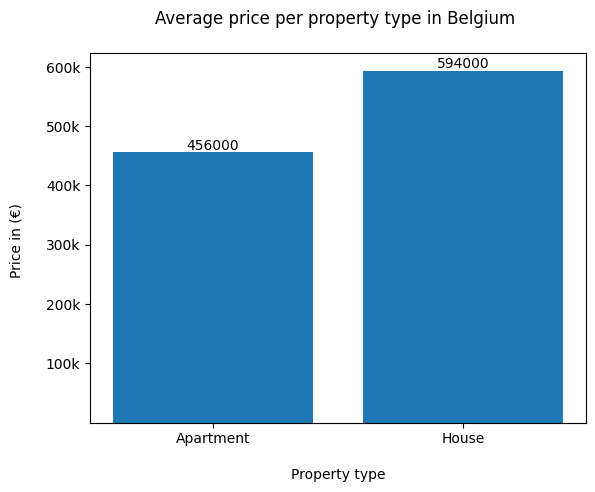

In [91]:
# Type of property House vs. appartment

apartment_average = properties[properties['type of property'] == 'APARTMENT']['price'].mean()
apartment_average = int(apartment_average)

house_average = properties[properties['type of property'] == 'HOUSE']['price'].mean()
house_average = int(house_average)

average_price = {}
average_price['Apartment'] = apartment_average
average_price['House'] = house_average
print(average_price)

price_keys = list(average_price.keys())
price_values = list(average_price.values())



for price in range(len(price_values)):
    rounded = round(price_values[price], -3)
    price_values[price] = rounded
print(price_values)

bar_colors = ['tab:red', 'tab:blue']
plt.bar(price_keys, price_values, width = 0.4, color = bar_colors)
plt.title('Average price per property type in Belgium \n')
plt.xlabel('\nProperty type')
plt.ylabel('Price in (€) \n')
plt.bar_label(plt.bar(average_price.keys(), price_values))
plt.yticks([100000, 200000 , 300000 , 400000 , 500000 , 600000] , ['100k' , '200k' , '300k' , '400k' , '500k' , '600k'])
plt.show()
